<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/estatistica/me/estat_tarefa02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Métodos Estatísticos

* **Prof.: Diego Barreto Haddad**
* **Aluno: Janio de Souza Lima**

Exercícios Aula 02

##1 Avaliar efeito de regime de saúde envolvendo dieta e exercícios nas taxas de colesterol.

Dados para análise: Redução do colesterol por grupo.
* Grupo controle: participantes que não realizaram o regime.
* Grupo de tramento: participantes que realizaram o tratamento.

In [ ]:
grupo_controle = [7, 3, -4, 14, 2,
                  5, 22, -7, 9, 5]
                  
grupo_tratamento = [-6, 5, 9, 4, 4,
                    12, 37, 5, 3, 3]

### a) Compute a média, a mediana e a média truncada de 10% (trimmed mean) para ambos os grupos.

As células a seguir realizam o cálculo das medidas solicitadas e sua exibição em tela.

In [ ]:
import numpy as np

In [ ]:
#Média de cada grupo
media_controle = np.mean(grupo_controle)
media_tratamento = np.mean(grupo_tratamento)

#Visualização dos resultados
print('Média dos grupos')
print('-'*40)
print(f'Grupo de controle: {media_controle}\nGrupo de tratamento: {media_tratamento}')

Média dos grupos
----------------------------------------
Grupo de controle: 5.6
Grupo de tratamento: 7.6


In [ ]:
import pandas as pd

In [ ]:
reg = pd.DataFrame({'Grupo': ['Controle', 'Tratamento', 'Diferença do tratamento (%)'],
                    'Média': [media_controle, media_tratamento,
                              (media_tratamento-media_controle)/media_controle*100]})

In [ ]:
#Mediana de cada grupo
mediana_controle = np.median(grupo_controle)
mediana_tratamento = np.median(grupo_tratamento)

reg['Mediana'] = [mediana_controle, mediana_tratamento,
                  (mediana_tratamento-mediana_controle)/mediana_controle*100]

#Visualização dos resultados
print('Mediana dos grupos')
print('-'*40)
print(f'Grupo de controle: {mediana_controle}\nGrupo de tratamento: '+
      f'{mediana_tratamento}')

Mediana dos grupos
----------------------------------------
Grupo de controle: 5.0
Grupo de tratamento: 4.5


In [ ]:
from scipy import stats

In [ ]:
#Média trucada de cada grupo
media_t_controle = stats.trim_mean(grupo_controle,
                                         proportiontocut=0.10)
media_t_tratamento = stats.trim_mean(grupo_tratamento,
                                           proportiontocut=0.10)

reg['Média Truncada'] = [media_t_controle, media_t_tratamento,
                         (media_t_tratamento-media_t_controle)/media_t_controle*100]

#Visualização dos resultados
print('Média truncada* dos grupos')
print('-'*40)
print(f'Grupo de controle: {media_t_controle}\nGrupo de tratamento: '+
      f'{media_t_tratamento}')
print('*Proporção de corte de 10%')

Média truncada* dos grupos
----------------------------------------
Grupo de controle: 5.125
Grupo de tratamento: 5.625
*Proporção de corte de 10%


In [ ]:
#Visão consolidada das medidas
reg

,Grupo,Média,Mediana,Média Truncada
0,Controle,5.600000,5.0,5.125000
1,Tratamento,7.600000,4.5,5.625000
2,Diferença do tratamento (%),35.714286,-10.0,9.756098


Como pode ser visto na tabela acima as medidas calculadas levam a diferentes conclusões sobre o efeito do regime.
* **Média:** Indica que o tratamento obteve maior redução do nível de colesterol, com uma diferença de 35,71%.
* **Média truncada:** Também indica que o tratamento obteve maior redução do nível de colesterol, porém com um nível de diferença menor (9.76%).
* **Mediana:** Indica que o tratamento teve efeito negativo na redução do nível de colesterol, sendo 10% pior que nos participantes sem o tratamento.

---


###b) Explique o porquê a diferença nas médias sugere uma conclusão acerca do efeito do regime, enquanto que a diferença nas medianas ou na média truncada sugere uma conclusão distinta.

Os valores das medidas de posição analisados isoladamente podem levar a conclusões equivocadas, pois dependendo do tamanho do grupo, da dispersão dos dados, presença de anomalias ou outros fatores, as medidas podem ser influenciadas e diminuir sua capacidade explicativa do conjunto de dados. Para facilitar esta análise, construimos a seguir o gráfico diagrama de caixa (*boxplot*) para uma análise visual da distribuição dos dois conjuntos de dados.

In [ ]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Grupo de Tratamento (Regime)')

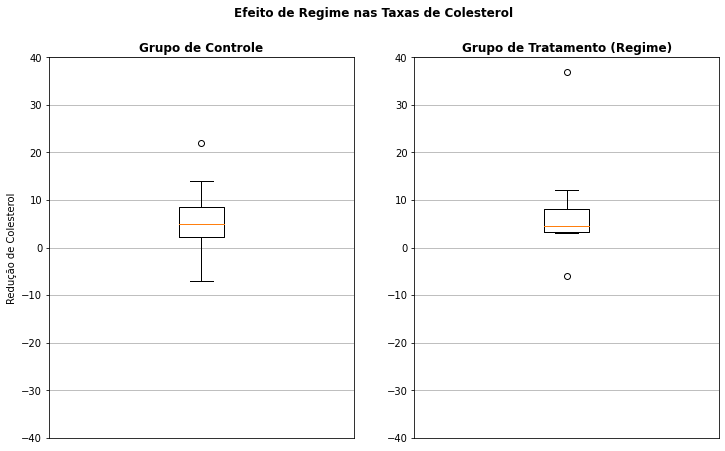

In [ ]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(12,7)
fig.suptitle('Efeito de Regime nas Taxas de Colesterol', fontweight='bold')

axes[0].boxplot(grupo_controle)
axes[0].grid()
axes[0].set_ylim(-40,40)
axes[0].set_xticks([])
axes[0].set_title('Grupo de Controle', fontweight='bold')
axes[0].set_ylabel('Redução de Colesterol')

axes[1].boxplot(grupo_tratamento)
axes[1].grid()
axes[1].set_ylim(-40,40)
axes[1].set_xticks([])
axes[1].set_title('Grupo de Tratamento (Regime)', fontweight='bold')

Como se observa na análise gráfica há tanto uma diferença na distribuição quanto na ocorrência de valores extremos (*outliers*) em ambos conjuntos de dados. Além disso, no grupo de tratamento há uma amplitude maior dos valores acima da mediana, como pode ser visto tanto pelo menor segmento da caixa quanto do "bigode" na parte inferior do gráfico, enquanto no grupo de controle os a amplitude de valores é um pouco mais uniforme em ambos lados (abaixo e acima da mediana), apesar do grupo de controle também possuir um valor extremo acima de 20. Por fim, uma única observação no grupo de tratamento está em uma faixa de valor muito superior às demais observações, o que pode influenciar algumas medidas como explicado a seguir.

Estas características dos dados levam a alguns efeitos nas medidas que explicam as conclusões discordantes, conforme segue:

**Média:**
* Esta medida não é robusta a valores extremos, ou seja, este tipo de valor afeta a medida aumentando ou diminuindo muito seu valor dependendo da extremidade em que eles se encontram. No caso em questão, o valor de 37 no conjunto de tratamento aumenta muito o valor da média, o que explica sua diferença de mais de 35% em relação ao grupo de controle. Esse fato junto com o tamanho muito pequeno dos conjuntos de dados pode indicar que a média não é uma boa medida para representar adequadamente os conjuntos, devendo-se, portanto ter cautela em conclusões sobre o estudo a partir da análise das médias dos grupos.

**Média Truncada**:
* A média trucada é calculada a partir da exclusão de parte das extremidades das observações. Neste caso, eliminamos 10% de cada extremidade (representado pelo parâmetro `proportioncut` na função `stats.trim_mean`). Apesar de ainda poder ser influenciado por valores extremos, seu impacto é menor que na média, por isso, a medida é considerada mais robusta a valores extremos e ao mesmo tempo mantém-se sensível aos valores no conjunto de dados.

**Mediana:**
* Por fim, a mediana é uma das medidas mais robustas a valores extremos, pois independente deles, sempre representará a posição mais central (em conjuntos ímpares) ou a média dos valores centrais. O problema é que quando há concentração de valores em um dos lados (abaixo ou acima da mediana), esta medida não será sensível a esta concentração.

---

##2 Durações de falhas de energia

In [ ]:
falhas = [22, 18, 135, 15, 90, 78, 69, 98, 102,
          83, 55, 28, 121, 120, 13, 22, 124, 112,
          70, 66, 74, 89, 103, 24, 21, 112, 21,
          40, 98, 87, 132, 115, 21, 28, 43, 37,
          50, 96, 118, 158, 74, 78, 83, 93, 95]

###a) Média amostral e mediana amostral


* **Média amostral:** Na média amostral o grau de liberdade é ajustado para $n-1$, onde $n$ é o número de elementos. O cálculo abaixo realiza este ajuste e o cálculo manual da média.

In [ ]:
#Cálculo manual da média amostral
#Na média amostral o grau de liberdade é ajustado para n-1
grau_de_liberdade = len(falhas)-1
media_amostral = sum(falhas)/(grau_de_liberdade)

print('Média amostral:')
media_amostral

Média amostral:


75.70454545454545

* **Mediana amostral:**

###b) Desvio padrão amostral

Para cálculo do desvio padrão amostral é usado o mesmo ajuste do grau de liberade, contudo, usamos para isto a função `np.std` que possui um parâmetro para este ajuste (`ddof`), cujo valor é padrão é $0$. Ao ajustá-lo para $1$, o divisor usando nos cálculos para a ser $n-1$.

In [ ]:
print('Desvio padrão amostral:')
np.std(falhas,
       ddof=1)

Desvio padrão amostral:


39.25759271604139

##3 Diâmetros de cabeças de rebites

In [ ]:
diametros = [6.72,6.77,6.82,6.70,6.78,6.70,6.62,6.75,
             6.66,6.66,6.64,6.76,6.73,6.80,6.72,6.76,
             6.76,6.68,6.66,6.62,6.72,6.76,6.70,6.78,
             6.76,6.67,6.70,6.72,6.74,6.81,6.79,6.78,
             6.66,6.76,6.76,6.72]

###a) Média amostral e desvio padrão amostral

In [ ]:
#Cálculo manual da média amostral
#Na média amostral o grau de liberdade é ajustado para n-1
grau_de_liberdade = len(diametros)-1
media_amostral = sum(diametros)/(grau_de_liberdade)

dp_amostral = np.std(diametros,
       ddof=1)

In [ ]:
print(f'Média amostral: {media_amostral:.3f}')
print(f'Desvio padrão amostral amostral: {dp_amostral:.3f}')

Média amostral: 6.918
Desvio padrão amostral amostral: 0.054


###b) Histogramas de frequência relativa e impactos dos intervalos na informação visual

**Construção dos histogramas**:

(array([3., 0., 5., 1., 9., 1., 2., 8., 5., 2.]),
 array([6.62, 6.64, 6.66, 6.68, 6.7 , 6.72, 6.74, 6.76, 6.78, 6.8 , 6.82]),
 <a list of 10 Patch objects>)

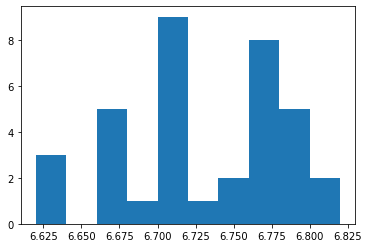

In [ ]:
plt.hist(diametros)

(array([3., 5., 5., 6., 9., 5., 3.]),
 array([6.62      , 6.64857143, 6.67714286, 6.70571429, 6.73428571,
        6.76285714, 6.79142857, 6.82      ]),
 <a list of 7 Patch objects>)

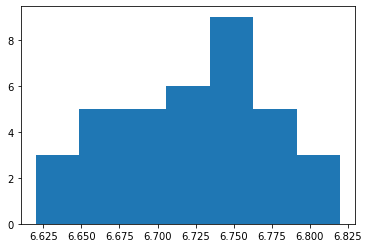

In [ ]:
plt.hist(diametros,
         bins=7)

(array([ 3.,  6., 10., 10.,  7.]),
 array([6.62, 6.66, 6.7 , 6.74, 6.78, 6.82]),
 <a list of 5 Patch objects>)

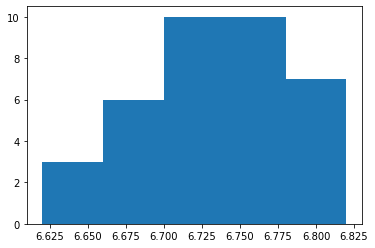

In [ ]:
plt.hist(diametros,
         bins=5)

**Análise do impacto dos intervalores:**

###c) Comentários sobre a distribuição dos dados (formato de sino)

##Referências: